In [149]:
'''Techniques of Feature selection:
    1. Univariate Selection (score func-> chi square,f_classif, mutual_info_classif)
    2. Feature Importance
    3.Correlation Matrix with Heatmap'''

'Techniques of Feature selection:\n    1. Univariate Selection (score func-> chi square,f_classif, mutual_info_classif)\n    2. Feature Importance\n    3.Correlation Matrix with Heatmap'

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
d = pd.read_csv('C:/Users/HP/Py Code/ML/Data/train.csv')

In [152]:
d.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [153]:
d.shape

(2000, 21)

In [154]:
d.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [155]:
X = d.drop('price_range', axis=1) #independent columns
y = d['price_range']   #target column i.e price range

# Univariate Selection

In [156]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#apply SelectKBest class to extract top 10 best features
test = SelectKBest(score_func= f_classif)
test.fit(X,y)
scores= pd.DataFrame(test.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,battery_power,31.598158
1,blue,0.476768
2,clock_speed,0.493708
3,dual_sim,0.428239
4,fc,0.772182
5,four_g,1.059525
6,int_memory,2.922996
7,m_dep,1.500682
8,mobile_wt,3.594318
9,n_cores,2.625415


In [157]:
print(featureScores.nlargest(10,'Score'))

            Specs        Score
13            ram  3520.110824
0   battery_power    31.598158
12       px_width    22.620882
11      px_height    19.484842
8       mobile_wt     3.594318
6      int_memory     2.922996
9         n_cores     2.625415
14           sc_h     2.225984
15           sc_w     1.671000
16      talk_time     1.628811


# Feature importances

In [158]:
from sklearn.ensemble import ExtraTreesClassifier


test = ExtraTreesClassifier()
test.fit(X,y)
scores = pd.DataFrame(test.feature_importances_)
columns = pd.DataFrame(X.columns)

feat_importances = pd.concat([columns,scores],axis=1)
feat_importances.columns = ['Specs','Importance']
feat_importances

,Specs,Importance
0,battery_power,0.062710
1,blue,0.018689
2,clock_speed,0.031529
3,dual_sim,0.018958
4,fc,0.030302
5,four_g,0.016970
6,int_memory,0.035480
7,m_dep,0.032193
8,mobile_wt,0.035750
9,n_cores,0.032387


In [159]:
print(feat_importances.nlargest(10,'Importance'))

            Specs  Importance
13            ram    0.405088
0   battery_power    0.062710
12       px_width    0.048367
11      px_height    0.047292
8       mobile_wt    0.035750
6      int_memory    0.035480
14           sc_h    0.034142
16      talk_time    0.034064
15           sc_w    0.032560
9         n_cores    0.032387


# Correlation Matrix with Heatmap

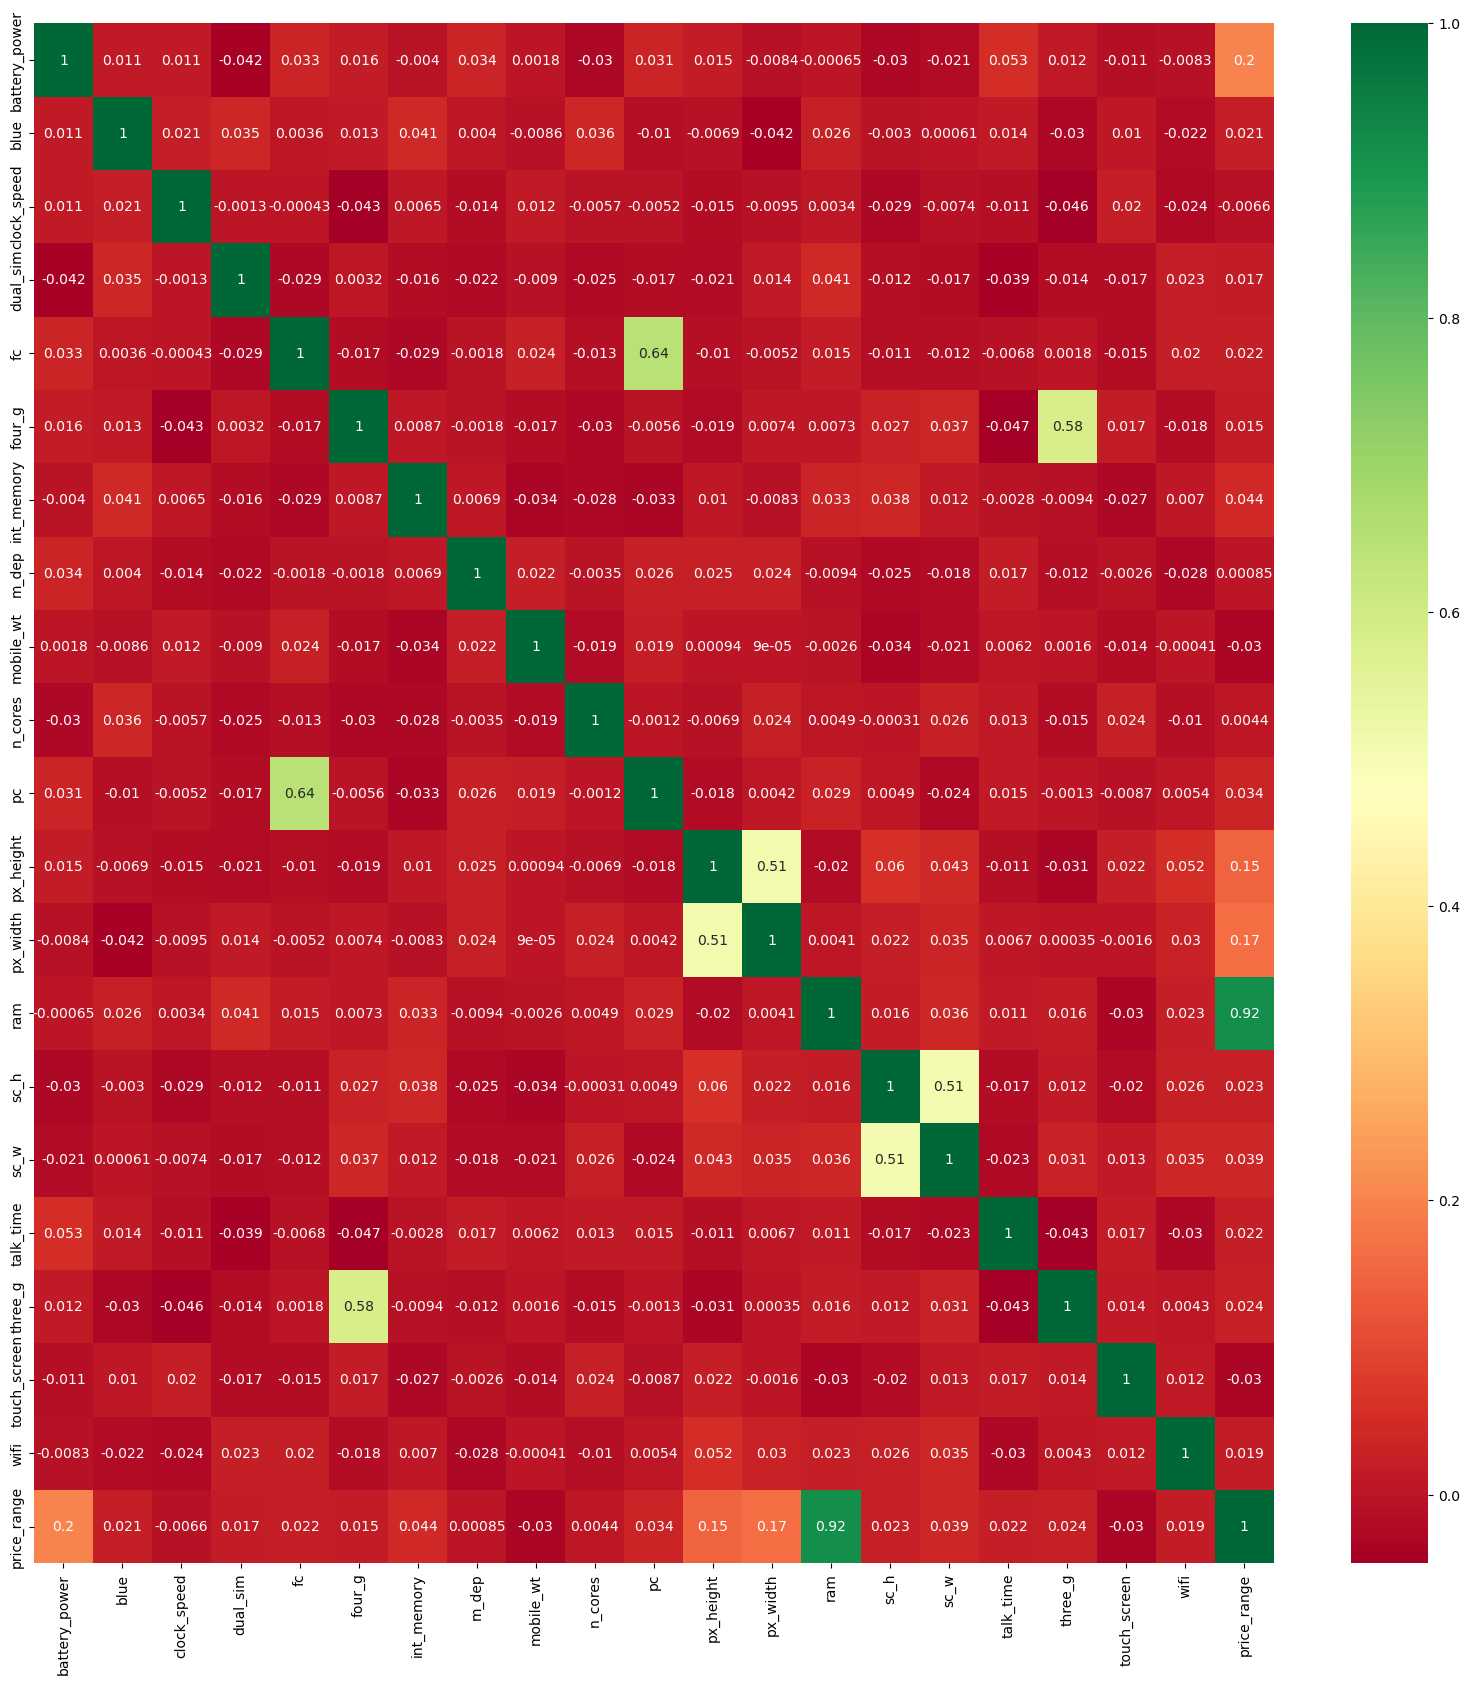

In [160]:
#get correlations of each features in dataset
corrmat = d.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(d[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [163]:
d.corr()['price_range'].nlargest(11)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
Name: price_range, dtype: float64